In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker

from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Arial"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)

dens = os.listdir('./radial_plot/radial_int_press_com')

try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

C:\Users\Nick\Desktop\jupyter_analysis_updated
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('./radial_plot/radial_int_press_com')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB  sizeBin_x  sizeBin_y  clust_size  int_id  current_id    ext_rad  \
0        0.0   5.016308   5.016308       42431       1           1  96.742227   
1        0.0   5.016308   5.016308       42431       1           1  96.742227   
2        0.0   5.016308   5.016308       42431       1           1  96.742227   
3        0.0   5.016308   5.016308       42431       1           1  96.742227   
4        0.0   5.016308   5.016308       42431       1           1  96.742227   
...      ...        ...        ...         ...     ...         ...        ...   
65189  207.6   5.016308   5.016308       33947       1           1  68.458629   
65190  207.6   5.016308   5.016308       33947       1           1  68.458629   
65191  207.6   5.016308   5.016308       33947       1           1  68.458629   
65192  207.6   5.016308   5.016308       33947       1           1  68.458629   
65193  207.6   5.016308   5.016308       33947       1           1  68.458629   

         int_rad         r      area       com_x       com_y  int_press_all  \
0      53.364434  0.020270  0.283957  127.631956  127.622060    3229.622902   
1      53.364434  0.040541  0.851871  127.631956  127.622060    2851.872658   
2      53.364434  0.060811  1.419785  127.631956  127.622060    3665.388472   
3      53.364434  0.081081  1.987699  127.631956  127.622060    3595.002715   
4      53.364434  0.101351  2.555613  127.631956  127.622060    3437.804658   
...          ...       ...       ...         ...         ...            ...   
65189  44.031194  1.418919  9.137671  147.787978  109.538155    2586.267494   
65190  44.031194  1.439189  9.269148  147.787978  109.538155    2636.485143   
65191  44.031194  1.459459  9.400626  147.787978  109.538155    2975.173425   
65192  44.031194  1.479730  9.532103  147.787978  109.538155    2492.105331   
65193  44.031194  1.500000  9.663580  147.787978  109.538155    2810.814339   

       int_press_A  int_press_B  fa_press_all  fa_press_A  fa_press_B  \
0      2730.569012  1255.802574     73.632079         0.0   -8.356883   
1      1502.274087  1196.043768     27.222676         0.0  110.867079   
2      1436.368350  2007.247326      7.337841         0.0    4.857971   
3      1778.508705  1896.946366      2.829045         0.0   43.139520   
4      1721.433512  1634.740507    -23.846424         0.0  -28.524796   
...            ...          ...           ...         ...         ...   
65189  1046.729117  1794.132802     -8.407133         0.0  -12.865100   
65190   859.419783  1762.574387    -40.764454         0.0  -39.150504   
65191  1040.215601  1961.747719      4.401773         0.0    5.735415   
65192   605.802204  2088.139328      2.850749         0.0    9.597666   
65193   953.724725  1936.772441     -7.662297         0.0  -10.644052   

          fa_all  fa_A       fa_B  align_all   align_A   align_B  \
0      11.540003   0.0  -6.990636  -0.056735 -0.336772 -0.013981   
1      24.622788   0.0  79.891970  -0.097173 -0.199962  0.159784   
2      16.876529   0.0  10.568744  -0.067736 -0.274128  0.021137   
3      10.813634   0.0  64.378648   0.082470  0.111041  0.128757   
4     -15.124631   0.0 -49.593336   0.006100  0.050776 -0.099187   
...          ...   ...        ...        ...       ...       ...   
65189  -7.867822   0.0 -22.103337   0.022770  0.013940 -0.044207   
65190 -21.096626   0.0 -14.764072  -0.065368 -0.097418 -0.029528   
65191   8.666744   0.0  15.678437  -0.032471 -0.127872  0.031357   
65192   8.595844   0.0  56.115086   0.000693 -0.072858  0.112230   
65193   5.268215   0.0  -1.000831  -0.056739 -0.102192 -0.002002   

       num_dens_all  num_dens_A  num_dens_B   num_all     num_A     num_B  
0          3.796168    3.580389    3.569130  1.045455  0.977273  0.977273  
1          1.768132    1.303211    1.574004  1.454545  1.068182  1.295455  
2          1.723966    1.210612    1.096176  2.363636  1.659091  1.500000  
3          1.679763    0.889450    1.030271  3.227273  1.704545  1.977273  
4          1

In [5]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index 

pe  peA  peB    xA  eps   phi  tauPer_dt
0  0    0  500  50.0  1.0  60.0   0.000001
1  0   50  500  50.0  1.0  60.0   0.000001
2  0  120  500  50.0  1.0  60.0   0.000001
3  0  150  500  50.0  1.0  60.0   0.000001
4  0  250  500  50.0  1.0  60.0   0.000001
5  0  400  500  50.0  1.0  60.0   0.000001
6  0  500  500  50.0  1.0  60.0   0.000001

In [6]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB  sizeBin_x  sizeBin_y  clust_size  int_id  current_id    ext_rad  \
0        0.0   5.016308   5.016308       42431       1           1  96.742227   
1        0.0   5.016308   5.016308       42431       1           1  96.742227   
2        0.0   5.016308   5.016308       42431       1           1  96.742227   
3        0.0   5.016308   5.016308       42431       1           1  96.742227   
4        0.0   5.016308   5.016308       42431       1           1  96.742227   
...      ...        ...        ...         ...     ...         ...        ...   
65189  207.6   5.016308   5.016308       33947       1           1  68.458629   
65190  207.6   5.016308   5.016308       33947       1           1  68.458629   
65191  207.6   5.016308   5.016308       33947       1           1  68.458629   
65192  207.6   5.016308   5.016308       33947       1           1  68.458629   
65193  207.6   5.016308   5.016308       33947       1           1  68.458629   

         int_rad         r      area       com_x       com_y  int_press_all  \
0      53.364434  0.020270  0.283957  127.631956  127.622060    3229.622902   
1      53.364434  0.040541  0.851871  127.631956  127.622060    2851.872658   
2      53.364434  0.060811  1.419785  127.631956  127.622060    3665.388472   
3      53.364434  0.081081  1.987699  127.631956  127.622060    3595.002715   
4      53.364434  0.101351  2.555613  127.631956  127.622060    3437.804658   
...          ...       ...       ...         ...         ...            ...   
65189  44.031194  1.418919  9.137671  147.787978  109.538155    2586.267494   
65190  44.031194  1.439189  9.269148  147.787978  109.538155    2636.485143   
65191  44.031194  1.459459  9.400626  147.787978  109.538155    2975.173425   
65192  44.031194  1.479730  9.532103  147.787978  109.538155    2492.105331   
65193  44.031194  1.500000  9.663580  147.787978  109.538155    2810.814339   

       int_press_A  int_press_B  fa_press_all  fa_press_A  fa_press_B  \
0      2730.569012  1255.802574     73.632079         0.0   -8.356883   
1      1502.274087  1196.043768     27.222676         0.0  110.867079   
2      1436.368350  2007.247326      7.337841         0.0    4.857971   
3      1778.508705  1896.946366      2.829045         0.0   43.139520   
4      1721.433512  1634.740507    -23.846424         0.0  -28.524796   
...            ...          ...           ...         ...         ...   
65189  1046.729117  1794.132802     -8.407133         0.0  -12.865100   
65190   859.419783  1762.574387    -40.764454         0.0  -39.150504   
65191  1040.215601  1961.747719      4.401773         0.0    5.735415   
65192   605.802204  2088.139328      2.850749         0.0    9.597666   
65193   953.724725  1936.772441     -7.662297         0.0  -10.644052   

          fa_all  fa_A       fa_B  align_all   align_A   align_B  \
0      11.540003   0.0  -6.990636  -0.056735 -0.336772 -0.013981   
1      24.622788   0.0  79.891970  -0.097173 -0.199962  0.159784   
2      16.876529   0.0  10.568744  -0.067736 -0.274128  0.021137   
3      10.813634   0.0  64.378648   0.082470  0.111041  0.128757   
4     -15.124631   0.0 -49.593336   0.006100  0.050776 -0.099187   
...          ...   ...        ...        ...       ...       ...   
65189  -7.867822   0.0 -22.103337   0.022770  0.013940 -0.044207   
65190 -21.096626   0.0 -14.764072  -0.065368 -0.097418 -0.029528   
65191   8.666744   0.0  15.678437  -0.032471 -0.127872  0.031357   
65192   8.595844   0.0  56.115086   0.000693 -0.072858  0.112230   
65193   5.268215   0.0  -1.000831  -0.056739 -0.102192 -0.002002   

       num_dens_all  num_dens_A  num_dens_B   num_all     num_A     num_B  
0          3.796168    3.580389    3.569130  1.045455  0.977273  0.977273  
1          1.768132    1.303211    1.574004  1.454545  1.068182  1.295455  
2          1.723966    1.210612    1.096176  2.363636  1.659091  1.500000  
3          1.679763    0.889450    1.030271  3.227273  1.704545  1.977273  
4          1

5.016308
5.016308


In [7]:
int_id_arr = np.array([])
current_id_arr = np.array([])


avg_int_tot_fa_arr = {}
avg_int_tot_faA_arr = {}
avg_int_tot_faB_arr = {}
avg_int_num_densB_arr = {}
avg_int_num_densA_arr = {}
avg_int_num_dens_arr = {}
avg_r_arr = {}


avg_int_all_press_rad = {}
avg_int_A_press_rad = {}
avg_int_B_press_rad = {}
avg_int_press_rad_rad = {}

avg_int_rad_rad = {}
avg_int_ext_rad_rad = {}
avg_int_int_rad_rad = {}

avg_int_num_all_rad = {}
avg_int_num_A_rad = {}
avg_int_num_B_rad = {}

avg_int_num_dens_all_rad = {}
avg_int_num_dens_A_rad = {}
avg_int_num_dens_B_rad = {}

avg_int_align_all_rad = {}
avg_int_align_A_rad = {}
avg_int_align_B_rad = {}

avg_int_fa_all_rad = {}
avg_int_fa_A_rad = {}
avg_int_fa_B_rad = {}

avg_int_fa_press_all_rad = {}
avg_int_fa_press_A_rad = {}
avg_int_fa_press_B_rad = {}

avg_int_com_x_rad = {}
avg_int_com_y_rad = {}
avg_int_area_rad = {}

avg_bub_rad_rad = {}
avg_bub_ext_rad_rad = {}
avg_bub_int_rad_rad = {}

avg_bub_num_all_rad = {}
avg_bub_num_A_rad = {}
avg_bub_num_B_rad = {}

avg_bub_num_dens_all_rad = {}
avg_bub_num_dens_A_rad = {}
avg_bub_num_dens_B_rad = {}

avg_bub_align_all_rad = {}
avg_bub_align_A_rad = {}
avg_bub_align_B_rad = {}

avg_bub_fa_all_rad = {}
avg_bub_fa_A_rad = {}
avg_bub_fa_B_rad = {}

avg_bub_fa_press_all_rad = {}
avg_bub_fa_press_A_rad = {}
avg_bub_fa_press_B_rad = {}

avg_bub_com_x_rad = {}
avg_bub_com_y_rad = {}
avg_bub_area_rad = {}
            

for k in range(0, len(all_dens)):


        int_rad_rad = np.zeros(74)
        int_ext_rad_rad = np.zeros(74)
        int_int_rad_rad = np.zeros(74)

        int_num_all_rad = np.zeros(74)
        int_num_A_rad = np.zeros(74)
        int_num_B_rad = np.zeros(74)

        int_num_dens_all_rad = np.zeros(74)
        int_num_dens_A_rad = np.zeros(74)
        int_num_dens_B_rad = np.zeros(74)

        int_align_all_rad = np.zeros(74)
        int_align_A_rad = np.zeros(74)
        int_align_B_rad = np.zeros(74)

        int_fa_all_rad = np.zeros(74)
        int_fa_A_rad = np.zeros(74)
        int_fa_B_rad = np.zeros(74)

        int_fa_press_all_rad = np.zeros(74)
        int_fa_press_A_rad = np.zeros(74)
        int_fa_press_B_rad = np.zeros(74)

        int_com_x_rad = np.zeros(74)
        int_com_y_rad = np.zeros(74)
        int_area_rad = np.zeros(74)

        bub_num_rad = 0

        bub_rad_rad = np.zeros(74)
        bub_ext_rad_rad = np.zeros(74)
        bub_int_rad_rad = np.zeros(74)

        bub_num_all_rad = np.zeros(74)
        bub_num_A_rad = np.zeros(74)
        bub_num_B_rad = np.zeros(74)

        bub_num_dens_all_rad = np.zeros(74)
        bub_num_dens_A_rad = np.zeros(74)
        bub_num_dens_B_rad = np.zeros(74)

        bub_align_all_rad = np.zeros(74)
        bub_align_A_rad = np.zeros(74)
        bub_align_B_rad = np.zeros(74)

        bub_fa_all_rad = np.zeros(74)
        bub_fa_A_rad = np.zeros(74)
        bub_fa_B_rad = np.zeros(74)

        bub_fa_press_all_rad = np.zeros(74)
        bub_fa_press_A_rad = np.zeros(74)
        bub_fa_press_B_rad = np.zeros(74)

        bub_com_x_rad = np.zeros(74)
        bub_com_y_rad = np.zeros(74)
        bub_area_rad = np.zeros(74)

        int_all_press_rad = np.zeros(59)
        int_A_press_rad = np.zeros(59)
        int_B_press_rad = np.zeros(59)
        int_press_rad_rad = np.zeros(59)

        int_num_rad_rad = 0

        time_ids = np.array([])

        int_rad_rad = np.zeros(74)
        int_ext_rad_rad = np.zeros(74)
        int_int_rad_rad = np.zeros(74)

        int_num_all_rad = np.zeros(74)
        int_num_A_rad = np.zeros(74)
        int_num_B_rad = np.zeros(74)

        int_num_dens_all_rad = np.zeros(74)
        int_num_dens_A_rad = np.zeros(74)
        int_num_dens_B_rad = np.zeros(74)

        int_align_all_rad = np.zeros(74)
        int_align_A_rad = np.zeros(74)
        int_align_B_rad = np.zeros(74)

        int_fa_all_rad = np.zeros(74)
        int_fa_A_rad = np.zeros(74)
        int_fa_B_rad = np.zeros(74)

        int_fa_press_all_rad = np.zeros(74)
        int_fa_press_A_rad = np.zeros(74)
        int_fa_press_B_rad = np.zeros(74)

        int_com_x_rad = np.zeros(74)
        int_com_y_rad = np.zeros(74)
        int_area_rad = np.zeros(74)

        bub_num_rad = 0

        bub_rad_rad = np.zeros(74)
        bub_ext_rad_rad = np.zeros(74)
        bub_int_rad_rad = np.zeros(74)

        bub_num_all_rad = np.zeros(74)
        bub_num_A_rad = np.zeros(74)
        bub_num_B_rad = np.zeros(74)

        bub_num_dens_all_rad = np.zeros(74)
        bub_num_dens_A_rad = np.zeros(74)
        bub_num_dens_B_rad = np.zeros(74)

        bub_align_all_rad = np.zeros(74)
        bub_align_A_rad = np.zeros(74)
        bub_align_B_rad = np.zeros(74)

        bub_fa_all_rad = np.zeros(74)
        bub_fa_A_rad = np.zeros(74)
        bub_fa_B_rad = np.zeros(74)

        bub_fa_press_all_rad = np.zeros(74)
        bub_fa_press_A_rad = np.zeros(74)
        bub_fa_press_B_rad = np.zeros(74)

        bub_com_x_rad = np.zeros(74)
        bub_com_y_rad = np.zeros(74)
        bub_area_rad = np.zeros(74)

        int_all_press_rad = np.zeros(74)
        int_A_press_rad = np.zeros(74)
        int_B_press_rad = np.zeros(74)
        int_press_rad_rad = np.zeros(74)

        int_num_rad_rad = 0

        bub_num_rad = 0
        int_num_rad = 0

        for i in range(0, len(all_dens[k]['tauB'])):
            if (all_dens[k]['tauB'][i] not in time_ids) & (all_dens[k]['tauB'][i]>=100) & (all_dens[k]['tauB'][i]<=150):
                time_ids = np.append(time_ids, all_dens[k]['tauB'][i])

                loc_ids = np.where(all_dens[k]['tauB']==all_dens[k]['tauB'][i])[0]

                unique_ids = np.unique(all_dens[k].loc[:,'current_id'].to_numpy()[loc_ids])

                int_ids = np.where(all_dens[k].loc[:,'current_id'].to_numpy()[loc_ids]==all_dens[k].loc[:,'int_id'].to_numpy()[loc_ids][0])[0]

                int_rad_rad += all_dens[k].loc[:,'r'].to_numpy()[loc_ids][int_ids]
                int_ext_rad_rad += all_dens[k].loc[:,'ext_rad'].to_numpy()[loc_ids][int_ids]
                int_int_rad_rad += all_dens[k].loc[:,'int_rad'].to_numpy()[loc_ids][int_ids]

                int_num_all_rad += all_dens[k].loc[:,'num_all'].to_numpy()[loc_ids][int_ids]
                int_num_A_rad += all_dens[k].loc[:,'num_A'].to_numpy()[loc_ids][int_ids]
                int_num_B_rad += all_dens[k].loc[:,'num_B'].to_numpy()[loc_ids][int_ids]

                int_num_dens_all_rad += all_dens[k].loc[:,'num_dens_all'].to_numpy()[loc_ids][int_ids]
                int_num_dens_A_rad += all_dens[k].loc[:,'num_dens_A'].to_numpy()[loc_ids][int_ids]
                int_num_dens_B_rad += all_dens[k].loc[:,'num_dens_B'].to_numpy()[loc_ids][int_ids]

                int_align_all_rad += all_dens[k].loc[:,'align_all'].to_numpy()[loc_ids][int_ids]
                int_align_A_rad += all_dens[k].loc[:,'align_A'].to_numpy()[loc_ids][int_ids]
                int_align_B_rad += all_dens[k].loc[:,'align_B'].to_numpy()[loc_ids][int_ids]

                int_fa_all_rad += all_dens[k].loc[:,'fa_all'].to_numpy()[loc_ids][int_ids]
                int_fa_A_rad += all_dens[k].loc[:,'fa_A'].to_numpy()[loc_ids][int_ids]
                int_fa_B_rad += all_dens[k].loc[:,'fa_B'].to_numpy()[loc_ids][int_ids]

                int_fa_press_all_rad += all_dens[k].loc[:,'fa_press_all'].to_numpy()[loc_ids][int_ids]
                int_fa_press_A_rad += all_dens[k].loc[:,'fa_press_A'].to_numpy()[loc_ids][int_ids]
                int_fa_press_B_rad += all_dens[k].loc[:,'fa_press_B'].to_numpy()[loc_ids][int_ids]

                int_all_press_rad += all_dens[k].loc[:,'fa_press_all'].to_numpy()[loc_ids][int_ids]
                int_A_press_rad += all_dens[k].loc[:,'fa_press_A'].to_numpy()[loc_ids][int_ids]
                int_B_press_rad += all_dens[k].loc[:,'fa_press_B'].to_numpy()[loc_ids][int_ids]

                int_com_x_rad += all_dens[k].loc[:,'com_x'].to_numpy()[loc_ids][int_ids]
                int_com_y_rad += all_dens[k].loc[:,'com_y'].to_numpy()[loc_ids][int_ids]
                int_area_rad += all_dens[k].loc[:,'area'].to_numpy()[loc_ids][int_ids]


                int_num_rad +=1                    

        if int_num_rad > 0:

            avg_int_all_press_rad[str(params2['peA'][k])] = int_all_press_rad / int_num_rad
            avg_int_A_press_rad[str(params2['peA'][k])] = int_A_press_rad / int_num_rad
            avg_int_B_press_rad[str(params2['peA'][k])] = int_B_press_rad / int_num_rad
            avg_int_press_rad_rad[str(params2['peA'][k])] = int_press_rad_rad / int_num_rad

            avg_int_rad_rad[str(params2['peA'][k])] = int_rad_rad / int_num_rad
            avg_int_ext_rad_rad[str(params2['peA'][k])] = int_ext_rad_rad / int_num_rad
            avg_int_int_rad_rad[str(params2['peA'][k])] = int_int_rad_rad / int_num_rad

            avg_int_num_all_rad[str(params2['peA'][k])] = int_num_all_rad / int_num_rad
            avg_int_num_A_rad[str(params2['peA'][k])] = int_num_A_rad / int_num_rad
            avg_int_num_B_rad[str(params2['peA'][k])] = int_num_B_rad / int_num_rad

            avg_int_num_dens_all_rad[str(params2['peA'][k])] = int_num_dens_all_rad / int_num_rad
            avg_int_num_dens_A_rad[str(params2['peA'][k])] = int_num_dens_A_rad / int_num_rad
            avg_int_num_dens_B_rad[str(params2['peA'][k])] = int_num_dens_B_rad / int_num_rad

            avg_int_align_all_rad[str(params2['peA'][k])] = int_align_all_rad / int_num_rad
            avg_int_align_A_rad[str(params2['peA'][k])] = int_align_A_rad / int_num_rad
            avg_int_align_B_rad[str(params2['peA'][k])] = int_align_B_rad / int_num_rad

            avg_int_fa_all_rad[str(params2['peA'][k])] = int_fa_all_rad / int_num_rad
            avg_int_fa_A_rad[str(params2['peA'][k])] = int_fa_A_rad / int_num_rad
            avg_int_fa_B_rad[str(params2['peA'][k])] = int_fa_B_rad / int_num_rad

            avg_int_fa_press_all_rad[str(params2['peA'][k])] = int_fa_press_all_rad / int_num_rad
            avg_int_fa_press_A_rad[str(params2['peA'][k])] = int_fa_press_A_rad / int_num_rad
            avg_int_fa_press_B_rad[str(params2['peA'][k])] = int_fa_press_B_rad / int_num_rad

            avg_int_com_x_rad[str(params2['peA'][k])] = int_com_x_rad / int_num_rad
            avg_int_com_y_rad[str(params2['peA'][k])] = int_com_y_rad / int_num_rad
            avg_int_area_rad[str(params2['peA'][k])] = int_area_rad / int_num_rad
                

print(avg_int_rad_rad)
print(avg_int_num_dens_A_rad)

print(avg_int_num_all_rad)

{'0': array([0.02027027, 0.04054054, 0.06081081, 0.08108108, 0.10135135,
       0.12162162, 0.14189189, 0.16216216, 0.18243243, 0.2027027 ,
       0.22297297, 0.24324324, 0.26351351, 0.28378378, 0.30405405,
       0.32432432, 0.34459459, 0.36486487, 0.38513513, 0.40540541,
       0.42567568, 0.44594595, 0.46621622, 0.48648649, 0.50675676,
       0.52702703, 0.5472973 , 0.56756757, 0.58783784, 0.60810811,
       0.62837838, 0.64864865, 0.66891892, 0.68918919, 0.70945946,
       0.72972973, 0.75      , 0.77027027, 0.79054054, 0.81081081,
       0.83108108, 0.85135135, 0.87162162, 0.89189189, 0.91216216,
       0.93243243, 0.9527027 , 0.97297297, 0.99324324, 1.01351351,
       1.03378378, 1.05405405, 1.07432432, 1.09459459, 1.11486486,
       1.13513514, 1.15540541, 1.17567568, 1.19594595, 1.21621622,
       1.23648649, 1.25675676, 1.27702703, 1.2972973 , 1.31756757,
       1.33783784, 1.35810811, 1.37837838, 1.39864865, 1.41891892,
       1.43918919, 1.45945946, 1.47972973, 1.5       ]),

In [8]:
for j in range(0, 4):
    for key in avg_int_num_dens_all_rad:
        for i in range(0, len(avg_int_num_dens_all_rad[str(key)])):
            if (i > 0) & (i<len(avg_int_num_dens_all_rad[str(key)])-1):
                if avg_int_num_dens_all_rad[str(key)][i] > (1.02 * (avg_int_num_dens_all_rad[str(key)][i-1]+avg_int_num_dens_all_rad[str(key)][i+1])/2):
                    avg_int_num_dens_all_rad[str(key)][i] = (avg_int_num_dens_all_rad[str(key)][i-1]+avg_int_num_dens_all_rad[str(key)][i+1])/2
                    avg_int_num_dens_A_rad[str(key)][i] = (avg_int_num_dens_A_rad[str(key)][i-1]+avg_int_num_dens_A_rad[str(key)][i+1])/2
                    avg_int_num_dens_B_rad[str(key)][i] = (avg_int_num_dens_B_rad[str(key)][i-1]+avg_int_num_dens_B_rad[str(key)][i+1])/2
                
                    avg_int_align_all_rad[str(key)][i] = (avg_int_align_all_rad[str(key)][i-1]+avg_int_align_all_rad[str(key)][i+1])/2
                    avg_int_align_A_rad[str(key)][i] = (avg_int_align_A_rad[str(key)][i-1]+avg_int_align_A_rad[str(key)][i+1])/2
                    avg_int_align_B_rad[str(key)][i] = (avg_int_align_B_rad[str(key)][i-1]+avg_int_align_B_rad[str(key)][i+1])/2
                    
                    avg_int_all_press_rad[str(key)][i] = (avg_int_all_press_rad[str(key)][i-1]+avg_int_all_press_rad[str(key)][i+1])/2
                    avg_int_A_press_rad[str(key)][i] = (avg_int_A_press_rad[str(key)][i-1]+avg_int_A_press_rad[str(key)][i+1])/2
                    avg_int_B_press_rad[str(key)][i] = (avg_int_B_press_rad[str(key)][i-1]+avg_int_B_press_rad[str(key)][i+1])/2
                
                else:
                    avg_int_num_dens_all_rad[str(key)][i]= avg_int_num_dens_all_rad[str(key)][i]
                    avg_int_num_dens_A_rad[str(key)][i]= avg_int_num_dens_A_rad[str(key)][i]
                    avg_int_num_dens_B_rad[str(key)][i]= avg_int_num_dens_B_rad[str(key)][i]
                    
                    avg_int_align_all_rad[str(key)][i]= avg_int_align_all_rad[str(key)][i]
                    avg_int_align_A_rad[str(key)][i]= avg_int_align_A_rad[str(key)][i]
                    avg_int_align_B_rad[str(key)][i]= avg_int_align_B_rad[str(key)][i]
                    
                    avg_int_all_press_rad[str(key)][i] = avg_int_all_press_rad[str(key)][i]
                    avg_int_A_press_rad[str(key)][i] = avg_int_A_press_rad[str(key)][i]
                    avg_int_B_press_rad[str(key)][i] = avg_int_B_press_rad[str(key)][i]

            else:
                avg_int_num_dens_all_rad[str(key)][i]= avg_int_num_dens_all_rad[str(key)][i]
                avg_int_num_dens_A_rad[str(key)][i]= avg_int_num_dens_A_rad[str(key)][i]
                avg_int_num_dens_B_rad[str(key)][i]= avg_int_num_dens_B_rad[str(key)][i]
                
                avg_int_align_all_rad[str(key)][i]= avg_int_align_all_rad[str(key)][i]
                avg_int_align_A_rad[str(key)][i]= avg_int_align_A_rad[str(key)][i]
                avg_int_align_B_rad[str(key)][i]= avg_int_align_B_rad[str(key)][i]
                
                avg_int_all_press_rad[str(key)][i] = avg_int_all_press_rad[str(key)][i]
                avg_int_A_press_rad[str(key)][i] = avg_int_A_press_rad[str(key)][i]
                avg_int_B_press_rad[str(key)][i] = avg_int_B_press_rad[str(key)][i]

In [9]:
mkSz = [0.8, 0.8]
msz=18    
xa20 = '#282973'    
xa35 = '#4278BC'   
xa50 = "#f66e8d"
xa65 = '#F7931D'
xa80 = '#7E1416'

new_gas = ("#71797E")
new_int = ("#cc5500")
new_bulk = ("#4d9221")
#new_int = ("#ffd700")
new_dense = ("#6d4a3b")
new_dense = ("#8c510a")

new_red = '#e31a1c'
new_blue = '#1f78b4'
new_purp = '#7570b3'

regime1_c = ("#4b6b3c")
regime1_c = ("#8a9a5b")
regime2_c = ("#c7cb82")
regime3_c = ("#ded29e")
regime3_c = ("#f7dcb4")

regime1_c = '#fdfd96'
regime2_c = '#ff964f'
#regime2_c = '#fafabe'
regime3_c = '#cab2d6'
  

#regime3_c = ("#ded29e")
#regime3_c = ("#f4f0cb")

xa_dense_face = [new_dense, 'None', 'None', new_dense, 'None']
xa_dense_edge = ['None', new_dense, new_dense, 'None', new_dense]

xa_gas_face = [new_gas, 'None', 'None', new_gas, 'None']
xa_gas_edge = ['None', new_gas, new_gas, 'None', new_gas]

xa_bulk_face = [new_bulk, 'None', 'None', new_bulk, 'None']
xa_bulk_edge = ['None', new_bulk, new_bulk, 'None', new_bulk]

xa_int_face = [new_int, 'None', 'None', new_int, 'None']
xa_int_edge = ['None', new_int, new_int, 'None', new_int]

new_int2 = '#71797E'
xa_int_face2 = [new_int2, 'None', 'None', new_int2, 'None']
xa_int_edge2 = ['None', new_int2, new_int2, 'None', new_int2]

xa_bulk_BB_face = [new_red, 'None', 'None', new_red, 'None']
xa_bulk_BB_edge = ['None', new_red, new_red, 'None', new_red]

xa_bulk_AA_face = [new_blue, 'None', 'None', new_blue, 'None']
xa_bulk_AA_edge = ['None', new_blue, new_blue, 'None', new_blue]

xa_bulk_AB_face = [new_purp, 'None', 'None', new_purp, 'None']
xa_bulk_AB_edge = ['None', new_purp, new_purp, 'None', new_purp]

xa20 = 'x'    
xa35 = 'o'   
xa50 = "s"
xa65 = '+'
xa80 = '*'
msz=18
fsize=10
xa_mark = [xa20, xa35, xa50, xa65, xa80]
xa_size = [msz*42*0.7, msz*55*0.7, msz*49*0.7, msz*80*0.7, msz*85*0.7]

C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\2930264863.py:316: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


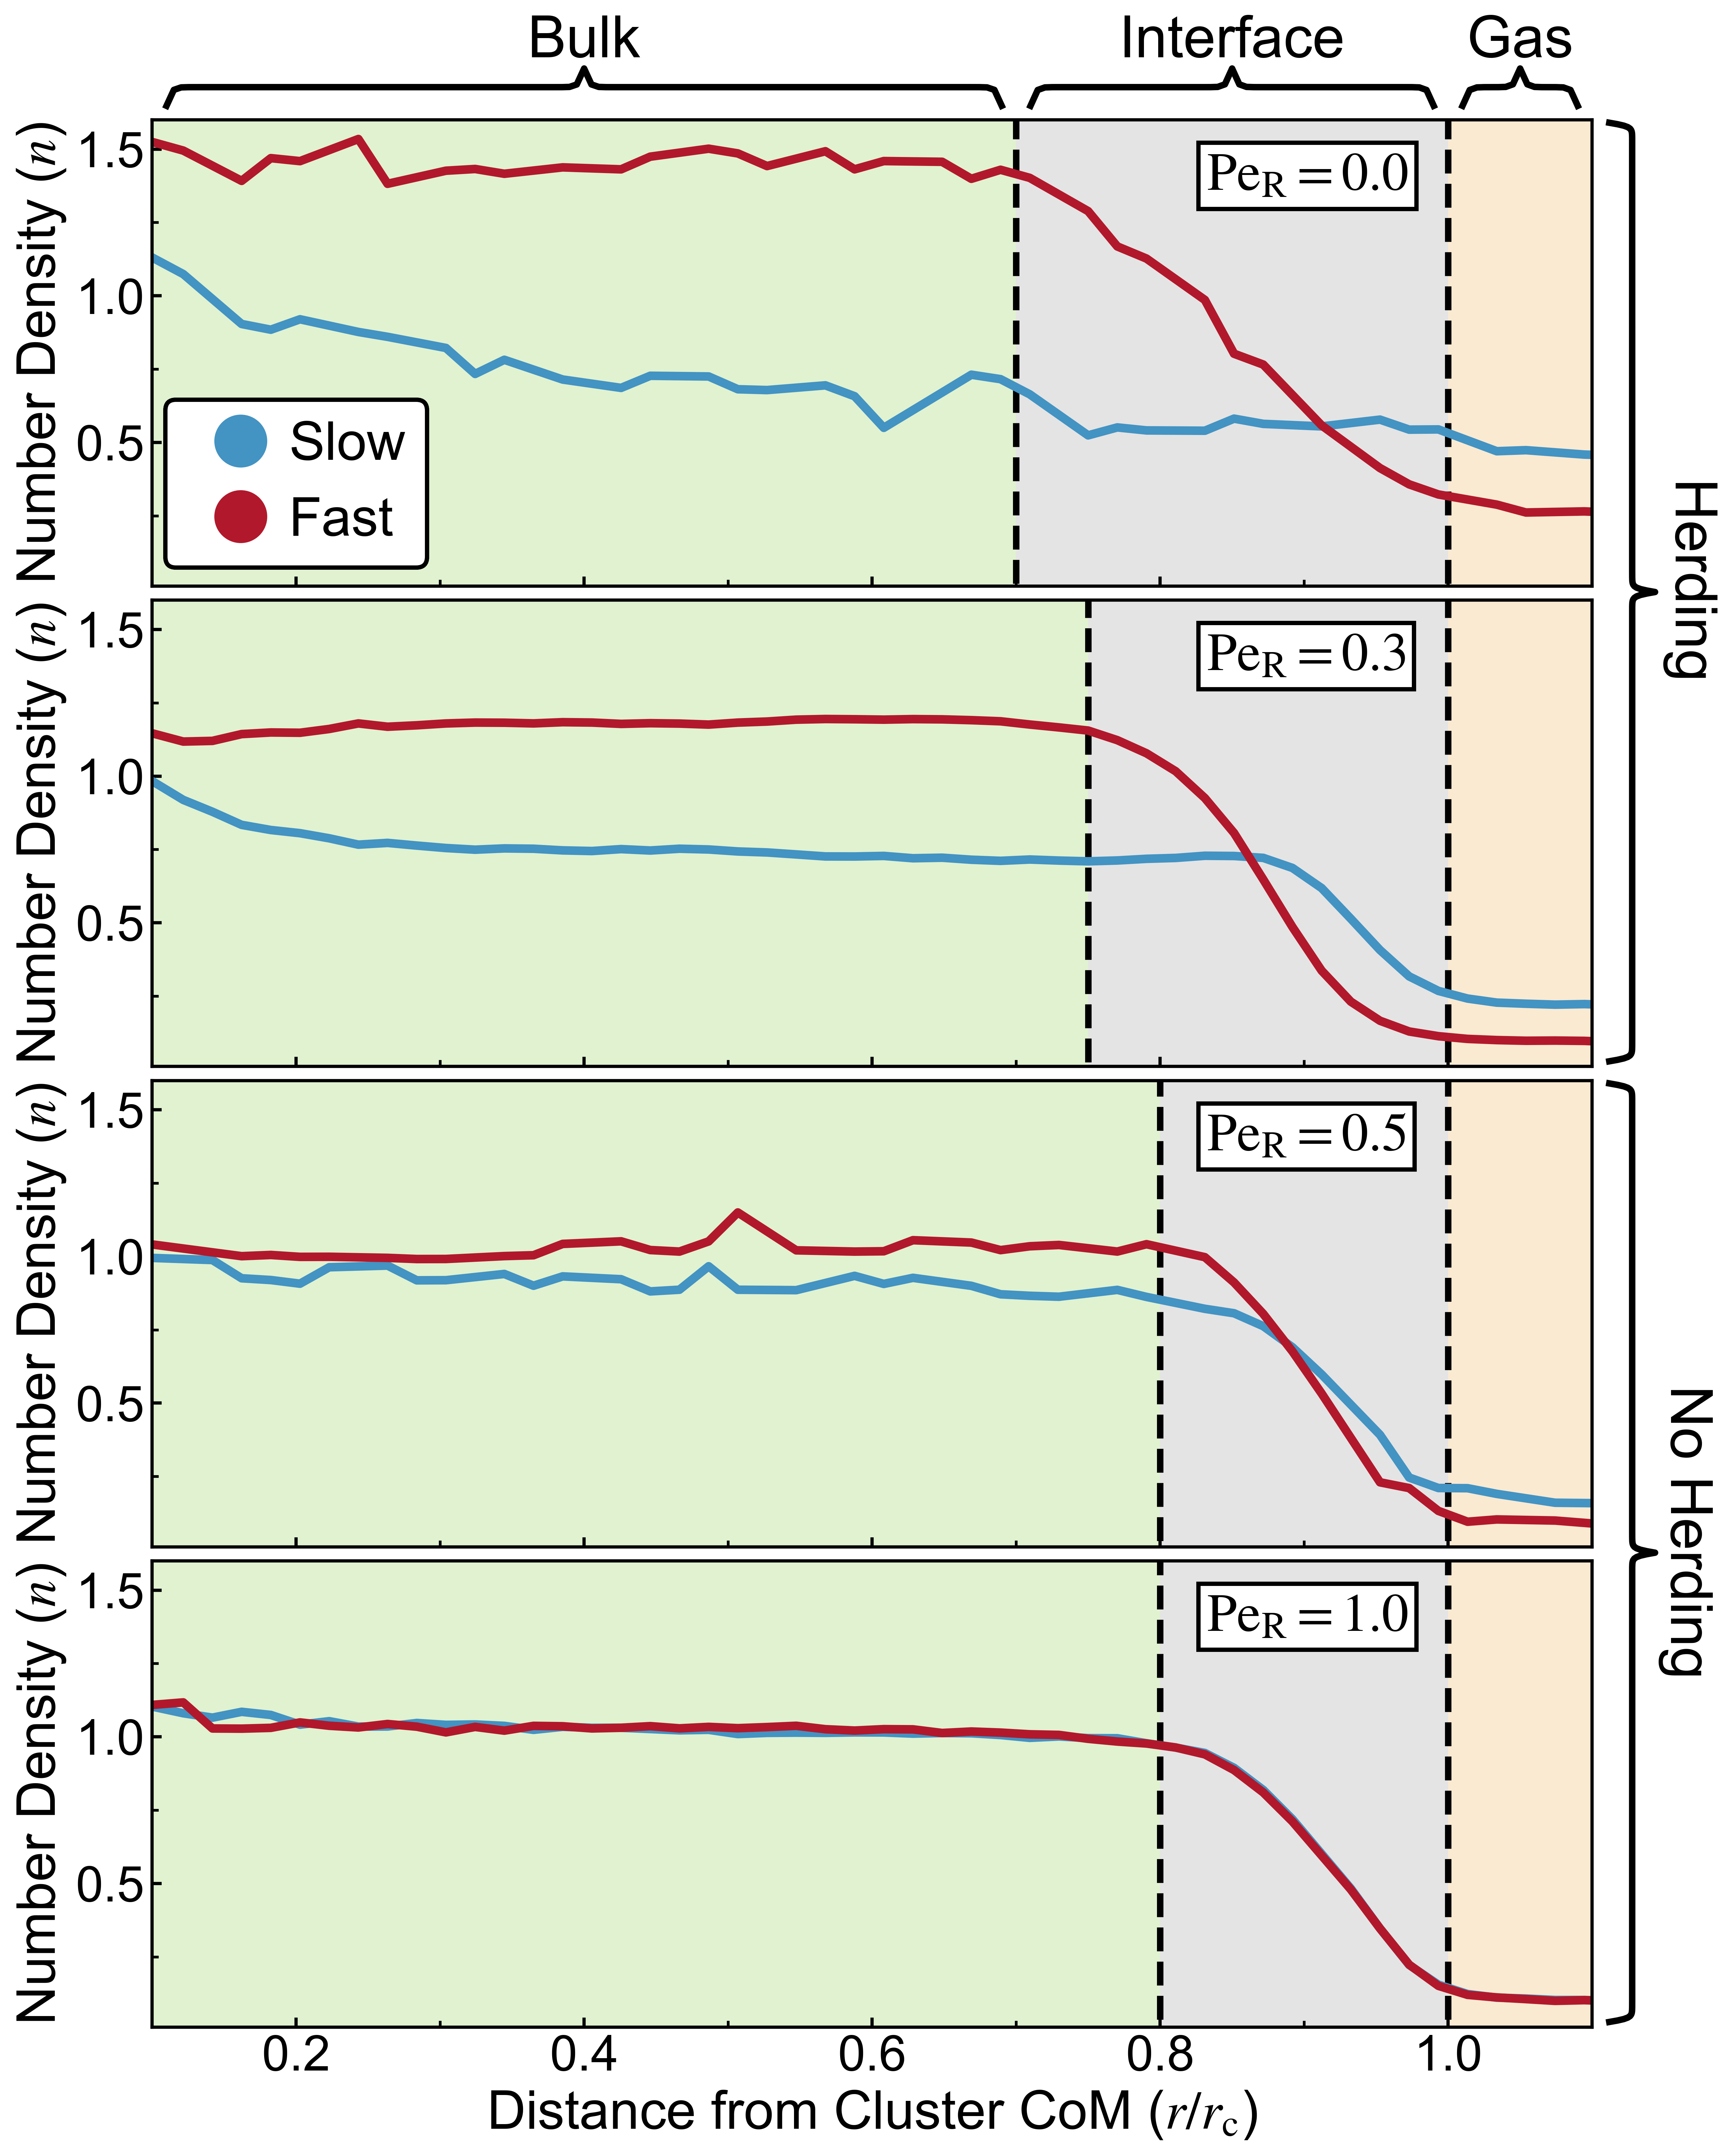

In [11]:
def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 500./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=3, clip_on=False)

    ax.text((xmax+xmin)/2., yy+.11*yspan, text, ha='center', va='bottom', fontsize=2.7*fsize)

def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)


import matplotlib.pyplot as plt
plt, ax1 = plt.subplots(4,1, figsize=(12,16))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"
#ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_all_rad['0'][4:], linewidth=4.0, c='black')
ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_A_rad['0'][4:], linewidth=4.0, c=new_blue)
ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_B_rad['0'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[0].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.7, 0.7], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[0].fill_betweenx(y=[-500, 500], x1=[0.7, 0.7], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[0].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1[0].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[0].plot([0.7, 0.7], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[0].tick_params(axis='y', labelsize=fsize*2.3)
ax1[0].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.5)
ax1[0].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.25)
ax1[0].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[0].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[0].xaxis.set_minor_locator(loc)

ax1[0].set_ylim([0.01,1.6])
ax1[0].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


fast_leg=[]
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=new_blue,
                      markerfacecolor=new_blue, 
                      label='Slow', markersize=(0.85*3.3*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=new_red,
                      markerfacecolor=new_red, 
                      label='Fast', markersize=(0.85*3.3*msz * mkSz[0])))

one_leg = ax1[0].legend(handles=fast_leg, loc='center',
             columnspacing=0.0, handletextpad=-0.1,
             bbox_transform=ax1[0].transAxes, bbox_to_anchor=[0.1, 0.22],
             fontsize=fsize*2.5, frameon=True, ncol=1, edgecolor='black')
one_leg.get_frame().set_linewidth(2.0)
one_leg.get_frame().set_alpha(1.0)
ax1[0].add_artist(one_leg)
"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""
ax1[0].set_ylabel(r'Number Density ($n$)', fontsize=fsize*2.5)

#ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_num_dens_all_rad['150'][4:], linewidth=4.0, c='black')
ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_num_dens_A_rad['150'][4:], linewidth=4.0, c=new_blue)
ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_num_dens_B_rad['150'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[1].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.75, 0.75], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[1].fill_betweenx(y=[-500, 500], x1=[0.75, 0.75], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[1].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1[1].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[1].plot([0.75, 0.75], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[1].tick_params(axis='y', labelsize=fsize*2.3)
ax1[1].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.5)
ax1[1].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.25)
ax1[1].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[1].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[1].xaxis.set_minor_locator(loc)

ax1[1].set_ylim([0.01,1.6])
ax1[1].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

ax1[0].xaxis.set_tick_params(labelbottom=False)

ax1[1].xaxis.set_tick_params(labelbottom=False)


ax1[1].set_ylabel(r'Number Density ($n$)', fontsize=fsize*2.5)



#ax1[2].plot(avg_int_rad_rad['250'][4:], avg_int_num_dens_all_rad['250'][4:], linewidth=4.0, c='black')
ax1[2].plot(avg_int_rad_rad['250'][4:], avg_int_num_dens_A_rad['250'][4:], linewidth=4.0, c=new_blue)
ax1[2].plot(avg_int_rad_rad['250'][4:], avg_int_num_dens_B_rad['250'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[2].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.8, 0.8], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[2].fill_betweenx(y=[-500, 500], x1=[0.8, 0.8], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[2].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)


ax1[2].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[2].plot([0.8, 0.8], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[2].tick_params(axis='y', labelsize=fsize*2.3)
ax1[2].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.5)
ax1[2].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.25)
ax1[2].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[2].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[2].xaxis.set_minor_locator(loc)

ax1[2].set_ylim([0.01,1.6])
ax1[2].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

ax1[2].xaxis.set_tick_params(labelbottom=False)


ax1[2].set_ylabel(r'Number Density ($n$)', fontsize=fsize*2.5)


#ax1[3].plot(avg_int_rad_rad['500'][4:], avg_int_num_dens_all_rad['500'][4:], linewidth=4.0, c='black')
ax1[3].plot(avg_int_rad_rad['500'][4:], avg_int_num_dens_A_rad['500'][4:], linewidth=4.0, c=new_blue)
ax1[3].plot(avg_int_rad_rad['500'][4:], avg_int_num_dens_B_rad['500'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[3].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.8, 0.8], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[3].fill_betweenx(y=[-500, 500], x1=[0.8, 0.8], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[3].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1[3].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[3].plot([0.8, 0.8], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[3].tick_params(axis='y', labelsize=fsize*2.3)
ax1[3].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.5)
ax1[3].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.25)
ax1[3].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[3].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[3].xaxis.set_minor_locator(loc)

ax1[3].set_ylim([0.01,1.6])
ax1[3].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D



ax1[3].set_ylabel(r'Number Density ($n$)', fontsize=fsize*2.5)

t1 = ax1[0].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.0$', fontsize=fsize*2.5, transform=ax1[0].transAxes)
t2 = ax1[1].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.3$', fontsize=fsize*2.5, transform=ax1[1].transAxes)
t3 = ax1[2].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.5$', fontsize=fsize*2.5, transform=ax1[2].transAxes)
t4 = ax1[3].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=1.0$', fontsize=fsize*2.5, transform=ax1[3].transAxes)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t2.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t3.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t4.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))

draw_brace(ax1[0], (0.11,0.69), 1.6, r'Bulk')
draw_brace(ax1[0], (0.71,0.99), 1.6, r'Interface')
draw_brace(ax1[0], (1.01,1.09), 1.6, r'Gas')

draw_brace2(ax1[0], (-1.61,1.59), 1.1, r'Herding')
draw_brace3(ax1[2], (-1.61,1.59), 1.1, r'No Herding')
ax1[3].set_xlabel(r'Distance from Cluster CoM ($r/r_\mathrm{c}$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.savefig('radial_dens.png',  dpi=200, pad_inches=0.0, transparent=False)
plt.show()


C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\935526204.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


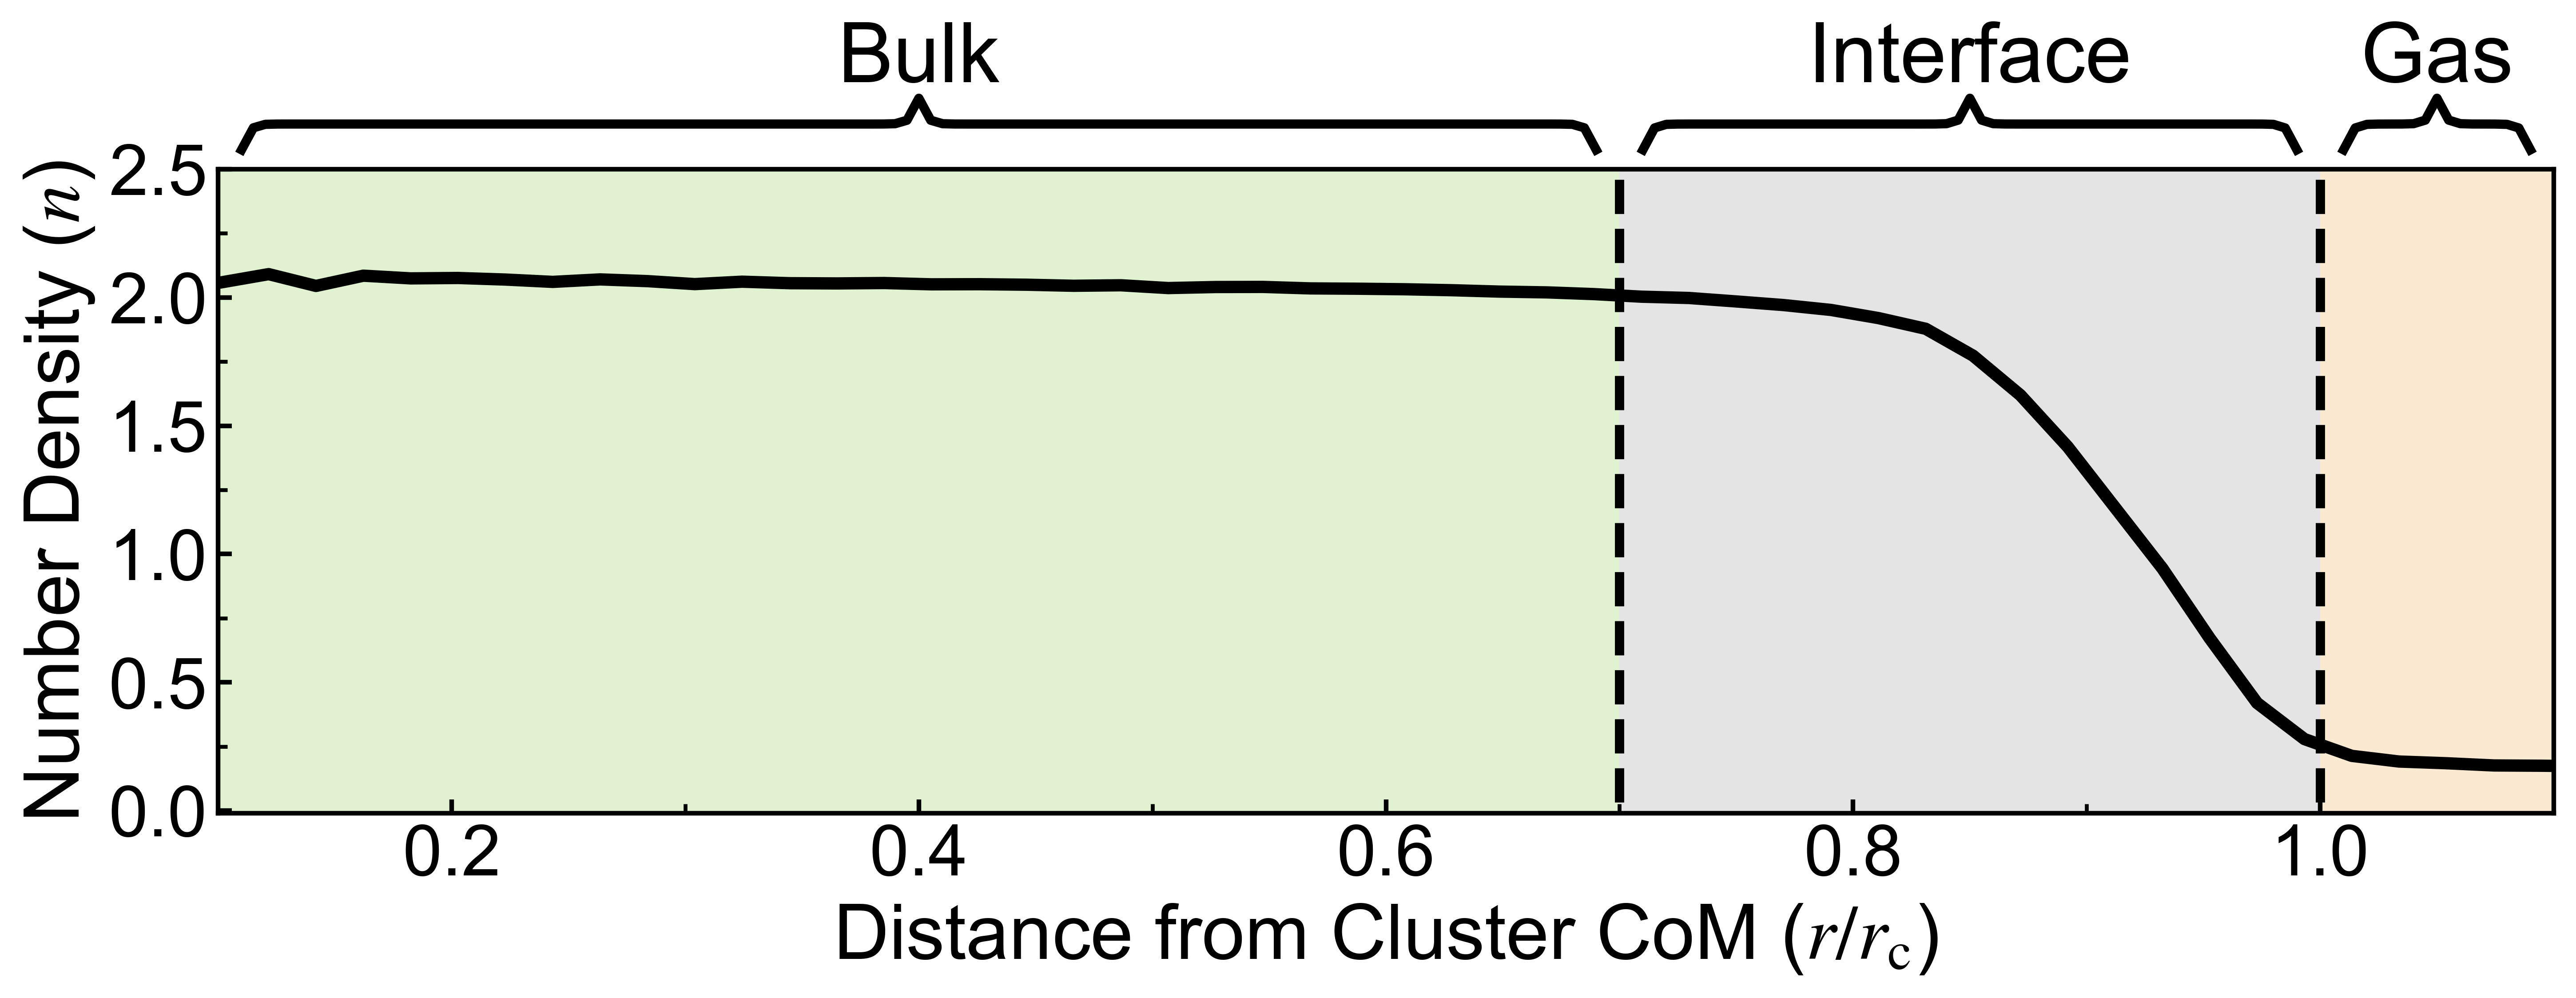

In [12]:
def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)


import matplotlib.pyplot as plt
plt, ax1 = plt.subplots(1,1, figsize=(12,5))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"
#ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_all_rad['0'][4:], linewidth=4.0, c='black')
ax1.plot(avg_int_rad_rad['500'][4:], avg_int_num_dens_all_rad['500'][4:], linewidth=4.0, c='black')
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1.fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.7, 0.7], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1.fill_betweenx(y=[-500, 500], x1=[0.7, 0.7], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1.fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1.plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1.plot([0.7, 0.7], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1.tick_params(axis='y', labelsize=fsize*2.3)
ax1.tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.5)
ax1.yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.25)
ax1.yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1.xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1.xaxis.set_minor_locator(loc)

ax1.set_ylim([-0.01,2.5])
ax1.set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""
ax1.set_ylabel(r'Number Density ($n$)', fontsize=fsize*2.5)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))

draw_brace(ax1, (0.11,0.69), 2.5, r'Bulk')
draw_brace(ax1, (0.71,0.99), 2.5, r'Interface')
draw_brace(ax1, (1.01,1.09), 2.5, r'Gas')

ax1.set_xlabel(r'Distance from Cluster CoM ($r/r_\mathrm{c}$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.tight_layout()
plt.savefig('fig37.png',  dpi=200, transparent=False)
plt.show()

C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\3390727006.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


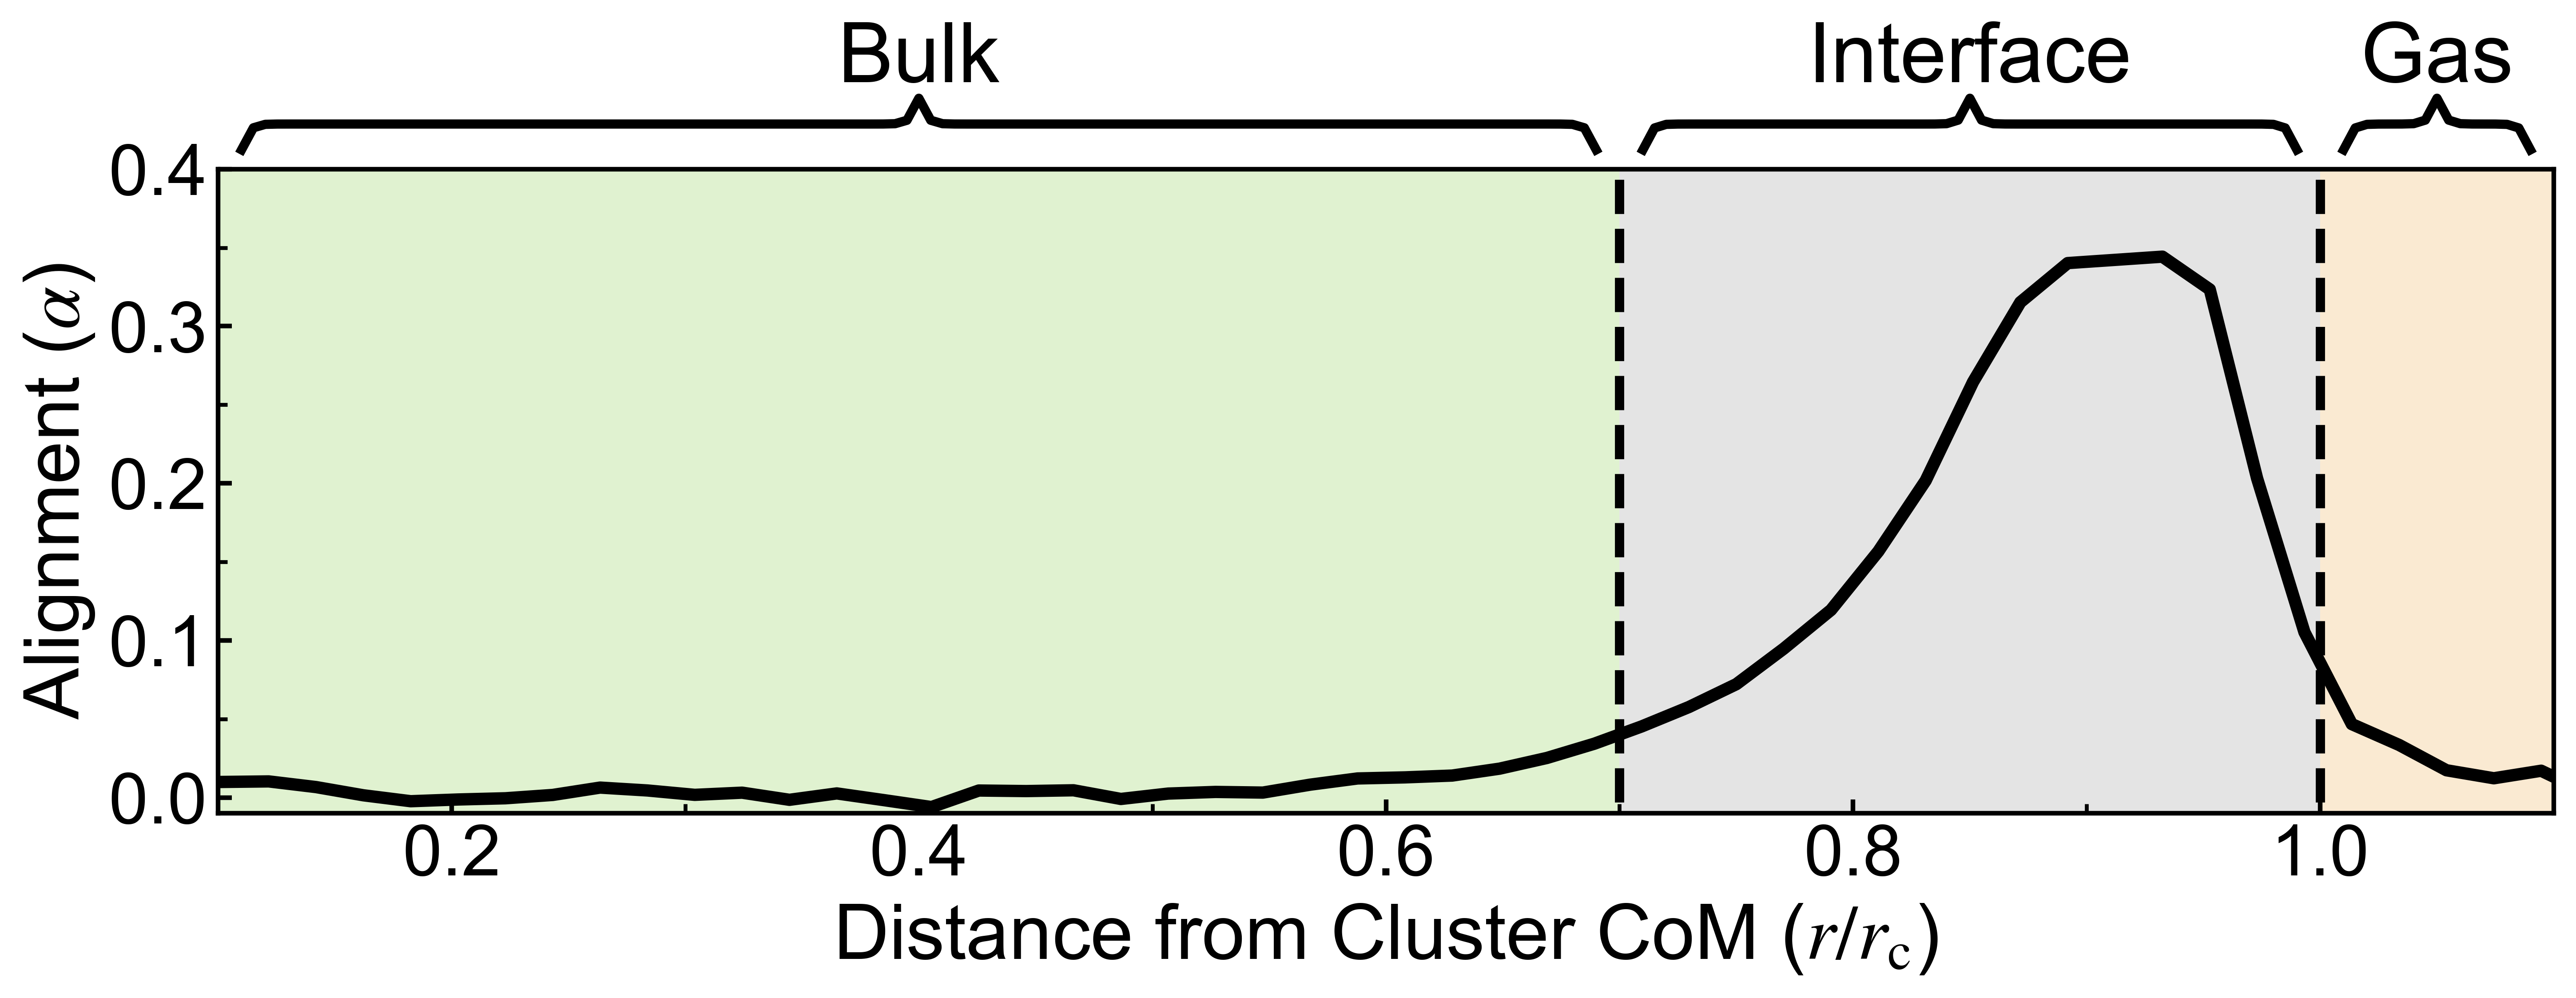

In [13]:
def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)


import matplotlib.pyplot as plt
plt, ax1 = plt.subplots(1,1, figsize=(12,5))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"
#ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_all_rad['0'][4:], linewidth=4.0, c='black')
ax1.plot(avg_int_rad_rad['500'][4:], avg_int_align_all_rad['500'][4:], linewidth=4.0, c='black')
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1.fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.7, 0.7], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1.fill_betweenx(y=[-500, 500], x1=[0.7, 0.7], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1.fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1.plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1.plot([0.7, 0.7], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1.tick_params(axis='y', labelsize=fsize*2.3)
ax1.tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.1)
ax1.yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.05)
ax1.yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1.xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1.xaxis.set_minor_locator(loc)

ax1.set_ylim([-0.01,0.4])
ax1.set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""
ax1.set_ylabel(r'Alignment ($\alpha$)', fontsize=fsize*2.5)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))

draw_brace(ax1, (0.11,0.69), 0.4, r'Bulk')
draw_brace(ax1, (0.71,0.99), 0.4, r'Interface')
draw_brace(ax1, (1.01,1.09), 0.4, r'Gas')

ax1.set_xlabel(r'Distance from Cluster CoM ($r/r_\mathrm{c}$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.tight_layout()
plt.savefig('fig38.png',  dpi=200, transparent=False)
plt.show()

C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\3892772771.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


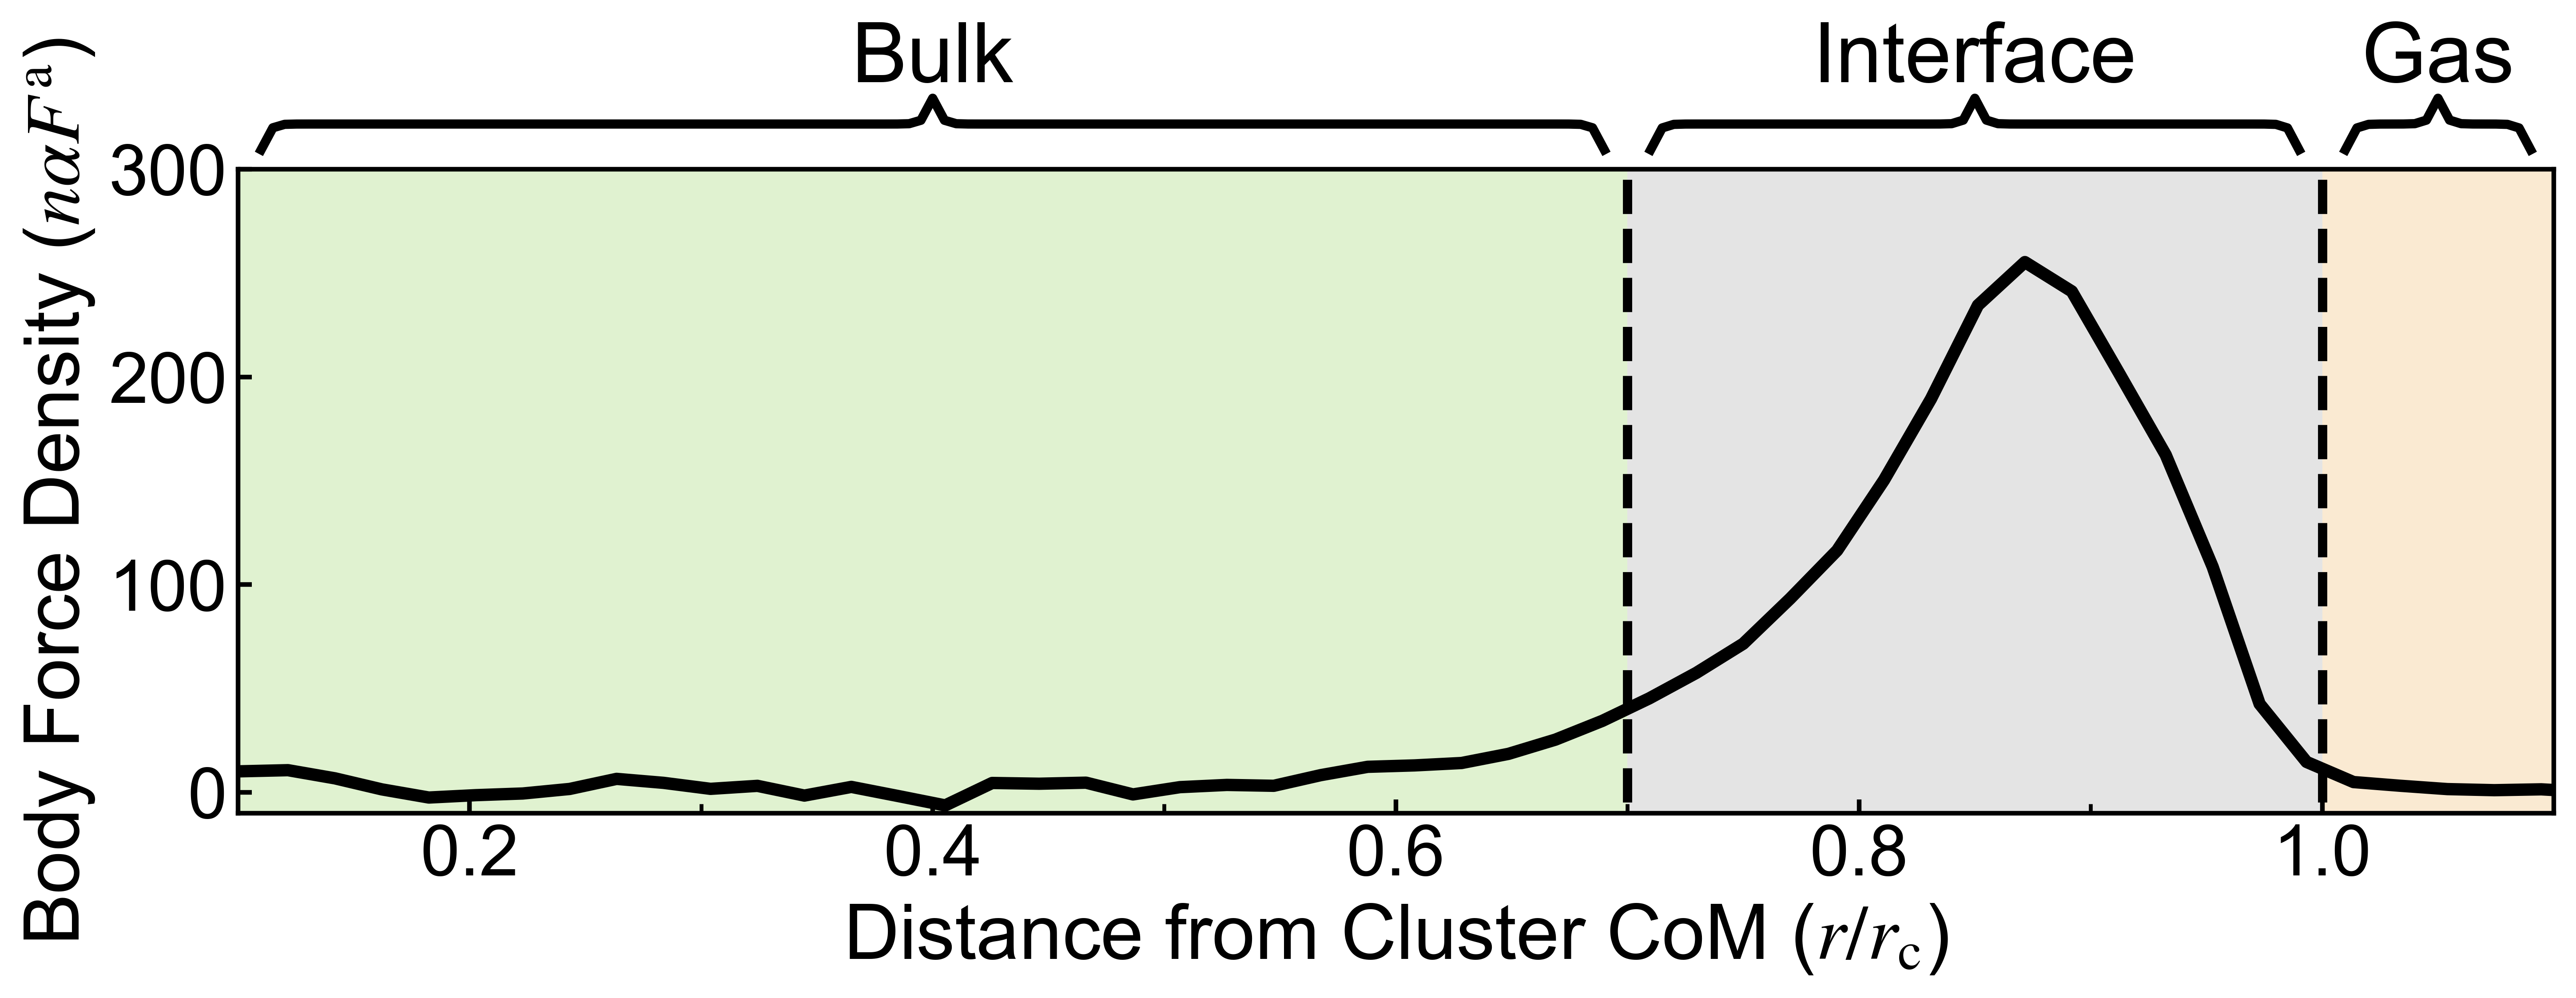

In [14]:
def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)


import matplotlib.pyplot as plt
plt, ax1 = plt.subplots(1,1, figsize=(12,5))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"
#ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_all_rad['0'][4:], linewidth=4.0, c='black')
ax1.plot(avg_int_rad_rad['500'][4:], avg_int_align_all_rad['500'][4:] * avg_int_num_dens_all_rad['500'][4:] * 500, linewidth=4.0, c='black')
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1.fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.7, 0.7], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1.fill_betweenx(y=[-500, 500], x1=[0.7, 0.7], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1.fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1.plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1.plot([0.7, 0.7], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1.tick_params(axis='y', labelsize=fsize*2.3)
ax1.tick_params(axis='x', labelsize=fsize*2.3)

#loc = MultipleLocator(base=0.1)
#ax1.yaxis.set_major_locator(loc)
#loc = MultipleLocator(base=0.05)
#ax1.yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1.xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1.xaxis.set_minor_locator(loc)

ax1.set_ylim([-10,300])
ax1.set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""
ax1.set_ylabel(r'Body Force Density ($n \alpha F^\mathrm{a}$)', fontsize=fsize*2.5)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))

draw_brace(ax1, (0.11,0.69), 300, r'Bulk')
draw_brace(ax1, (0.71,0.99), 300, r'Interface')
draw_brace(ax1, (1.01,1.09), 300, r'Gas')

ax1.set_xlabel(r'Distance from Cluster CoM ($r/r_\mathrm{c}$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.tight_layout()
plt.savefig('fig39.png',  dpi=200, transparent=False)
plt.show()

In [15]:
def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)


import matplotlib.pyplot as plt
plt, ax1 = plt.subplots(4,1, figsize=(12,16))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"
#ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_num_dens_all_rad['0'][4:], linewidth=4.0, c='black')
ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_align_A_rad['0'][4:], linewidth=4.0, c=new_blue)
ax1[0].plot(avg_int_rad_rad['0'][4:], avg_int_align_B_rad['0'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[0].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.7, 0.7], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[0].fill_betweenx(y=[-500, 500], x1=[0.7, 0.7], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[0].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1[0].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[0].plot([0.7, 0.7], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[0].tick_params(axis='y', labelsize=fsize*2.3)
ax1[0].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.15)
ax1[0].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.075)
ax1[0].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[0].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[0].xaxis.set_minor_locator(loc)

ax1[0].set_ylim([-0.01,0.6])
ax1[0].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


fast_leg=[]
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=new_blue,
                      markerfacecolor=new_blue, 
                      label='Slow', markersize=(0.85*3.3*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=new_red,
                      markerfacecolor=new_red, 
                      label='Fast', markersize=(0.85*3.3*msz * mkSz[0])))

one_leg = ax1[0].legend(handles=fast_leg, loc='center',
             columnspacing=0.0, handletextpad=-0.1,
             bbox_transform=ax1[0].transAxes, bbox_to_anchor=[0.1, 0.22],
             fontsize=fsize*2.5, frameon=True, ncol=1, edgecolor='black')
one_leg.get_frame().set_linewidth(2.0)
one_leg.get_frame().set_alpha(1.0)
ax1[0].add_artist(one_leg)
"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""
ax1[0].set_ylabel(r'Alignment ($\alpha$)', fontsize=fsize*2.5)

#ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_num_dens_all_rad['150'][4:], linewidth=4.0, c='black')
ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_align_A_rad['150'][4:], linewidth=4.0, c=new_blue)
ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_align_B_rad['150'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[1].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.75, 0.75], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[1].fill_betweenx(y=[-500, 500], x1=[0.75, 0.75], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[1].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1[1].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[1].plot([0.75, 0.75], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[1].tick_params(axis='y', labelsize=fsize*2.3)
ax1[1].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.15)
ax1[1].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.075)
ax1[1].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[1].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[1].xaxis.set_minor_locator(loc)

ax1[1].set_ylim([-0.01,0.6])
ax1[1].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

ax1[0].xaxis.set_tick_params(labelbottom=False)

ax1[1].xaxis.set_tick_params(labelbottom=False)


ax1[1].set_ylabel(r'Alignment ($\alpha$)', fontsize=fsize*2.5)



#ax1[2].plot(avg_int_rad_rad['250'][4:], avg_int_num_dens_all_rad['250'][4:], linewidth=4.0, c='black')
ax1[2].plot(avg_int_rad_rad['250'][4:], avg_int_align_A_rad['250'][4:], linewidth=4.0, c=new_blue)
ax1[2].plot(avg_int_rad_rad['250'][4:], avg_int_align_B_rad['250'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[2].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.8, 0.8], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[2].fill_betweenx(y=[-500, 500], x1=[0.8, 0.8], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[2].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)


ax1[2].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[2].plot([0.8, 0.8], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[2].tick_params(axis='y', labelsize=fsize*2.3)
ax1[2].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.15)
ax1[2].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.075)
ax1[2].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[2].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[2].xaxis.set_minor_locator(loc)

ax1[2].set_ylim([-0.01,0.6])
ax1[2].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

ax1[2].xaxis.set_tick_params(labelbottom=False)


ax1[2].set_ylabel(r'Alignment ($\alpha$)', fontsize=fsize*2.5)


#ax1[3].plot(avg_int_rad_rad['500'][4:], avg_int_num_dens_all_rad['500'][4:], linewidth=4.0, c='black')
ax1[3].plot(avg_int_rad_rad['500'][4:], avg_int_align_A_rad['500'][4:], linewidth=4.0, c=new_blue)
ax1[3].plot(avg_int_rad_rad['500'][4:], avg_int_align_B_rad['500'][4:], linewidth=4.0, c=new_red)
#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

ax1[3].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.8, 0.8], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
ax1[3].fill_betweenx(y=[-500, 500], x1=[0.8, 0.8], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
ax1[3].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

ax1[3].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
ax1[3].plot([0.8, 0.8], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[3].tick_params(axis='y', labelsize=fsize*2.3)
ax1[3].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=0.15)
ax1[3].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.075)
ax1[3].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=0.2)
ax1[3].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.1)
ax1[3].xaxis.set_minor_locator(loc)

ax1[3].set_ylim([-0.01,0.6])
ax1[3].set_xlim([0.1, 1.1])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D



ax1[3].set_ylabel(r'Alignment ($\alpha$)', fontsize=fsize*2.5)

t1 = ax1[0].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.0$', fontsize=fsize*2.5, transform=ax1[0].transAxes)
t2 = ax1[1].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.3$', fontsize=fsize*2.5, transform=ax1[1].transAxes)
t3 = ax1[2].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.5$', fontsize=fsize*2.5, transform=ax1[2].transAxes)
t4 = ax1[3].text(0.7325,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=1.0$', fontsize=fsize*2.5, transform=ax1[3].transAxes)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t2.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t3.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t4.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))

draw_brace(ax1[0], (0.11,0.69), 0.6, r'Bulk')
draw_brace(ax1[0], (0.71,0.99), 0.6, r'Interface')
draw_brace(ax1[0], (1.01,1.09), 0.6, r'Gas')

draw_brace2(ax1[0], (-1.61,1.59), 1.1, r'Herding')
draw_brace3(ax1[2], (-1.61,1.59), 1.1, r'No Herding')
ax1[3].set_xlabel(r'Distance from Cluster CoM ($r/r_\mathrm{c}$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.savefig('fig3.png',  dpi=200, pad_inches=0.0, transparent=False)
plt.show()


C:\Users\Nick\AppData\Local\Temp\ipykernel_22872\4129630780.py:292: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
